In [22]:
# All imports go here
import pandas as pd
from wordcloud import WordCloud
from utils.ngrams import get_frequency_distribution, convert_ngrams_docs
from utils.preprocess import preprocess_text
import matplotlib.pyplot as plt
from gensim.models import LdaMulticore
from gensim.models.ldamodel import LdaModel
from gensim.models.tfidfmodel import TfidfModel
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.matutils import corpus2dense
from sklearn.cluster import KMeans

In [2]:
# Load data
df_raw = pd.read_excel('../data/raw/bank.xlsx')

df_raw.head()

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1000000.0,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2000000.0,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2500000.0,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5500000.0,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6000000.0,.


# N-Grams

In this section, I will draw the word cloud of the most frequent 1-gram, 2-gram and 3-gram terms in __TRANSACTION DETAILS__. From the results, we can decide which words should be considered as stop words and be removed.

In [3]:
transaction_details = df_raw[~df_raw['TRANSACTION DETAILS'].isna()]['TRANSACTION DETAILS'].astype(str).tolist()

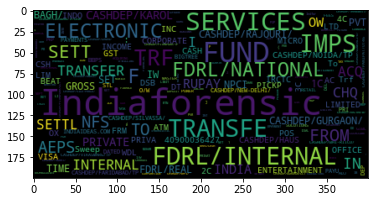

In [31]:
# 1-gram
gram_freq = get_frequency_distribution(transaction_details, 1)

gram_freq_dict = {}
for key, value in gram_freq.items():
    gram_freq_dict[' '.join(key)] = value

wordcloud = WordCloud().generate_from_frequencies(gram_freq_dict)
wordcloud.to_file("../data/results/1-gram-word-cloud-raw.jpg")

plt.imshow(wordcloud, interpolation='bilinear')

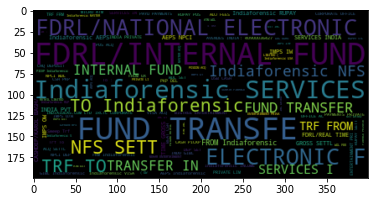

In [32]:
# 2-gram
gram_freq = get_frequency_distribution(transaction_details, 2)

gram_freq_dict = {}
for key, value in gram_freq.items():
    gram_freq_dict[' '.join(key)] = value

wordcloud = WordCloud().generate_from_frequencies(gram_freq_dict)
wordcloud.to_file("../data/results/1-gram-word-cloud-raw.jpg")

plt.imshow(wordcloud, interpolation='bilinear')

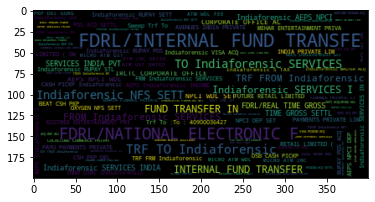

In [33]:
# 3-gram
gram_freq = get_frequency_distribution(transaction_details, 3)

gram_freq_dict = {}
for key, value in gram_freq.items():
    gram_freq_dict[' '.join(key)] = value

wordcloud = WordCloud().generate_from_frequencies(gram_freq_dict)
wordcloud.to_file("../data/results/1-gram-word-cloud-raw.jpg")

plt.imshow(wordcloud, interpolation='bilinear')

Based on the results, we also remove two high frequent words "Transfer" and "TRF". "TRF" is "Transfer" for short.

# Identify the Number of Categories

In this section, we will determine the number of categories using LDA. LDA is a topic modelling method which can group a given corpus and vocabulary into a given number of categories.

In [9]:
# Preprocess the data
transaction_details = [preprocess_text(transaction_detail) for transaction_detail in transaction_details]

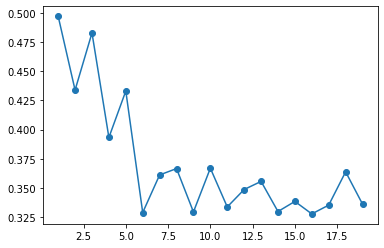

In [10]:
# n-gram = 1
X = []
Y = []
dictionary = Dictionary([transaction_detail.split() for transaction_detail in transaction_details])
corpus = [dictionary.doc2bow(word_tokenize(transaction_detail)) for transaction_detail in transaction_details]

for num_topics in range(1, 20):
    lda = LdaModel(corpus, num_topics, dictionary, alpha=0.01, eta=0.9)

    cm = CoherenceModel(model=lda, texts=[word_tokenize(transaction_detail) for transaction_detail in transaction_details], coherence='c_v', topn=10, window_size=10)
    coherence = cm.get_coherence()

    X.append(num_topics)
    Y.append(coherence)

plt.plot(X, Y, marker = 'o')
plt.show()

In [11]:
for i in range(num_topics):
    print(i, [dictionary[id] for id, freq in lda.get_topic_terms(i)])

0 ['OW', 'C', 'RET', 'PAYMENT', 'NEFT//INDIAN', 'O/W', 'I/W', 'NATIONAL', 'ACH', 'DR']
1 ['F', 'FDRL/NATIONAL', 'ELECTRONIC', 'NEFT/FDRL/Indiaforensic', 'BEAT', 'PKP', 'GURG', 'CASH', 'PICKP', 'DSB']
2 ['SERVICES', 'Indiaforensic', 'FRM', 'SE', 'FUNDS', 'MOBILE', 'SERVICE', 'FND', 'MERCHANT', 'PR']
3 ['SERVIC', 'COMMDEL', 'CONSULTING', 'ACTIVATION', 'VOUCHER', 'CASHDEP/KAROL', 'BAGH/', 'SERVI', 'RTGS/CITIH/PAY', 'FND']
4 ['VIDYUT', 'VITARA', 'MUZAFFARPUR', 'ELECTRICITY', 'BHAGALPUR', 'DIS', 'NEFT/KKBK/Acc', 'RTGS/YESBH/IRC', 'DT', 'LIMITED']
5 ['IRCTC', 'AC', 'OFFICE', 'CORPORATE', 'LTD', 'INDIAIDEAS.COM', 'TATA', 'NEFT', 'POWER', 'RTGS/HDFCH/Indfor']
6 ['INDIA', 'PVT', 'AVENUES', 'SOLUTIONS', 'PRIVAT', 'LOCALCUBE', 'COMMERCE', 'MOBILE', 'NOMISMA', 'QWIKCILVER']
7 ['IMPS', 'C', 'OX', 'OW', 'RTN', 'O/W', 'I/W', 'PENALTY', 'GA', 'CASHDEP/NOIDA/TP']
8 ['PA', 'NEFT//PAYU', 'CSH', 'DEL', 'NEFT//INDIAID', 'BEAT', 'PKP', 'GURGA', 'CASHDEP/GURGAON/LCT', 'NEFT//QWIKCIL']
9 ['RTGS/ICICH/Indfor',

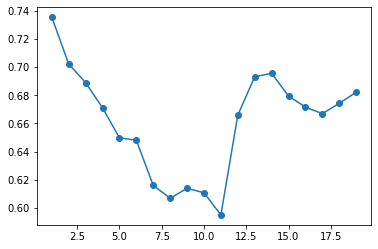

In [12]:
# n-gram = 2
docs = convert_ngrams_docs(transaction_details, 2)

dictionary = Dictionary([doc.split() for doc in docs])
corpus = [dictionary.doc2bow(word_tokenize(doc)) for doc in docs]

X = []
Y = []

for num_topics in range(1, 20):
    lda = LdaModel(corpus, num_topics, dictionary)

    cm = CoherenceModel(model=lda, texts=[word_tokenize(doc) for doc in docs], corpus=corpus, coherence='c_v')
    coherence = cm.get_coherence()

    X.append(num_topics)
    Y.append(coherence)

plt.plot(X, Y, marker = 'o')
plt.show()

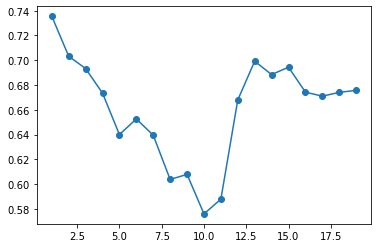

In [13]:
# n-gram = 3
docs = convert_ngrams_docs(transaction_details, 3)

dictionary = Dictionary([doc.split() for doc in docs])
corpus = [dictionary.doc2bow(word_tokenize(doc)) for doc in docs]


X = []
Y = []

for num_topics in range(1, 20):
    lda = LdaModel(corpus, num_topics, dictionary)

    cm = CoherenceModel(model=lda, texts=[word_tokenize(doc) for doc in docs], corpus=corpus, coherence='c_v')
    coherence = cm.get_coherence()

    X.append(num_topics)
    Y.append(coherence)

plt.plot(X, Y, marker = 'o')
plt.show()

From the above charts, the largest number of categories is always 1, and when n = 2 or 3, the 14 categories also have a large coherence score. The reason can be that many words are special code in bank statements, for example "O/W" and it stands for a transfering method or staff like that. As we wish to cluster them into multiple groups and recognize the differences among them, we choose to use __14__ in this project.

# Clustering

In [24]:
# n-gram = 2
docs = convert_ngrams_docs(transaction_details, 2)

dictionary = Dictionary([doc.split() for doc in docs])
corpus_bow = [dictionary.doc2bow(word_tokenize(doc)) for doc in docs]

tfidf = TfidfModel(corpus_bow)
corpus_tfidf = tfidf[corpus_bow]
corpus_tfidf_dense = corpus2dense(corpus_tfidf, dictionary.__len__(), docs.__len__())

model = KMeans(n_clusters=14)
clusters = model.fit_predict(corpus_tfidf_dense.T)

In [31]:
df_result = df_raw[~df_raw['TRANSACTION DETAILS'].isna()]
df_result['cluster'] = clusters

df_result.to_csv('../data/results/clustered_bank_statement.csv', index=False)

<ipython-input-31-a8a393c8bb62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['cluster'] = clusters


# Further Analysis